In [1]:
import json
import matplotlib.pyplot as plt
from ipyleaflet import (Map, basemaps, basemap_to_tiles, WMSLayer, Marker, GeoJSON, AwesomeIcon, ImageOverlay, 
                        ScaleControl, LayersControl, ZoomControl, FullScreenControl, LayerGroup) # DrawControl, 

In [2]:
# https://ipyleaflet.readthedocs.io/en/latest/map_and_basemaps/basemaps.html
# basemaps.Esri.WorldImagery
# basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),
gebco =WMSLayer(
    url='https://www.gebco.net/data_and_products/gebco_web_services/web_map_service/mapserv',
    layers='GEBCO_LATEST',
    format='image/png',
    transparent=True,
    attribution='GEBCO'
)
m = Map(
    basemap=gebco,
    center=(42.9, 36.4),
    zoom=7,
    zoom_control=False,
    attribution_control=False
    )
m.add_control(ZoomControl(position='topright'))
m.add_control(LayersControl(position='topleft'))
m.add_control(ScaleControl(position='bottomright', metric=True, imperial=False))
m.add_control(FullScreenControl())

In [3]:
geojson_file1 = "./data/Bluestream.json"
with open(geojson_file1, 'r') as f:
    geo_json1 = json.load(f)
geojson_map_object = GeoJSON(name='Bluestream', data=geo_json1)
m.add_layer(geojson_map_object)

In [4]:
west_route = False
if west_route:
    geojson_file2 = "./data/Bluestream.json"
    with open(geojson_file2, 'r') as f:
        geo_json2 = json.load(f)
    geojson_map_object = GeoJSON(name='Bluestream', data=geo_json2)
    m.add_layer(geojson_map_object)

In [5]:
centre_route = False
if centre_route:
    geojson_file3 = "./data/COP_centre_route_5.json"
    with open(geojson_file3, 'r') as f:
        geo_json3 = json.load(f)
    geojson_map_object = GeoJSON(name='Centre route', data=geo_json3)
    m.add_layer(geojson_map_object)

In [6]:
m

No such comm: c63e252836d34af69f410a7778703663
No such comm: c63e252836d34af69f410a7778703663
No such comm: c63e252836d34af69f410a7778703663
No such comm: c63e252836d34af69f410a7778703663
No such comm: c63e252836d34af69f410a7778703663
No such comm: c63e252836d34af69f410a7778703663


Map(center=[42.9, 36.4], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [7]:
KP1 = geo_json1["properties"]["KP"]
depth1 = geo_json1["properties"]["elevation"]

In [8]:
if west_route:
    KP2 = geo_json2["properties"]["KP"]
    depth2 = geo_json2["properties"]["elevation"]

In [9]:
if centre_route:
    KP3 = geo_json3["properties"]["KP"]
    depth3 = geo_json3["properties"]["elevation"]

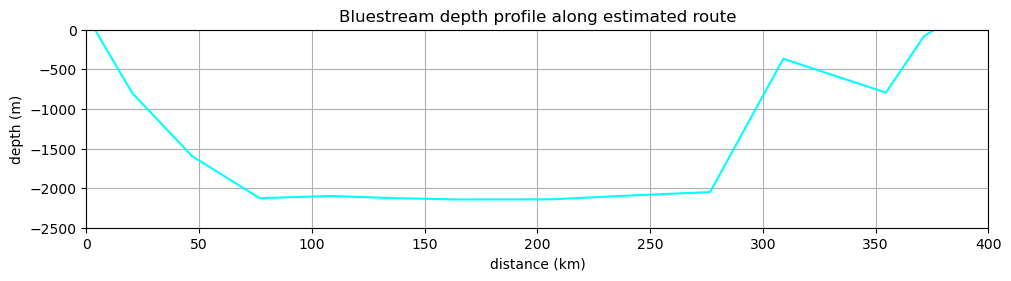

In [11]:
fig, ax = plt.subplots(figsize=(10, 2.7), layout='constrained')
ax.plot(KP1 , depth1, label='Bluestream', color="#00FFFF")  # #782576
if west_route: ax.plot(KP2 , depth2, label='west route', color="#c29819")  # "#c29819"
if centre_route: ax.plot(KP3 , depth3, label='centre route', color="#00FFFF")  
ax.set_xlabel('distance (km)')  # Add an x-label to the axes.
ax.set_ylabel('depth (m)')  # Add a y-label to the axes.
ax.set_title("Bluestream depth profile along estimated route")  # Add a title to the axes.
ax.grid(True)
ax.axis([0, 400, -2500, 0])
#ax.legend()  # Add a legend.
plt.savefig("./data/depth_profiles.png")